In [1]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



#Preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder


#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# laoding the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


 there is no missing value. Data is symmetrically or normally distributed as mean and median close to each other. Each column has Standard deviation close to zero ecept Happiness Rank and Happiness Score

In [8]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Text(0.5, 1.0, 'Percentage of feaquently occuring Regions & rarely occuring Regions')

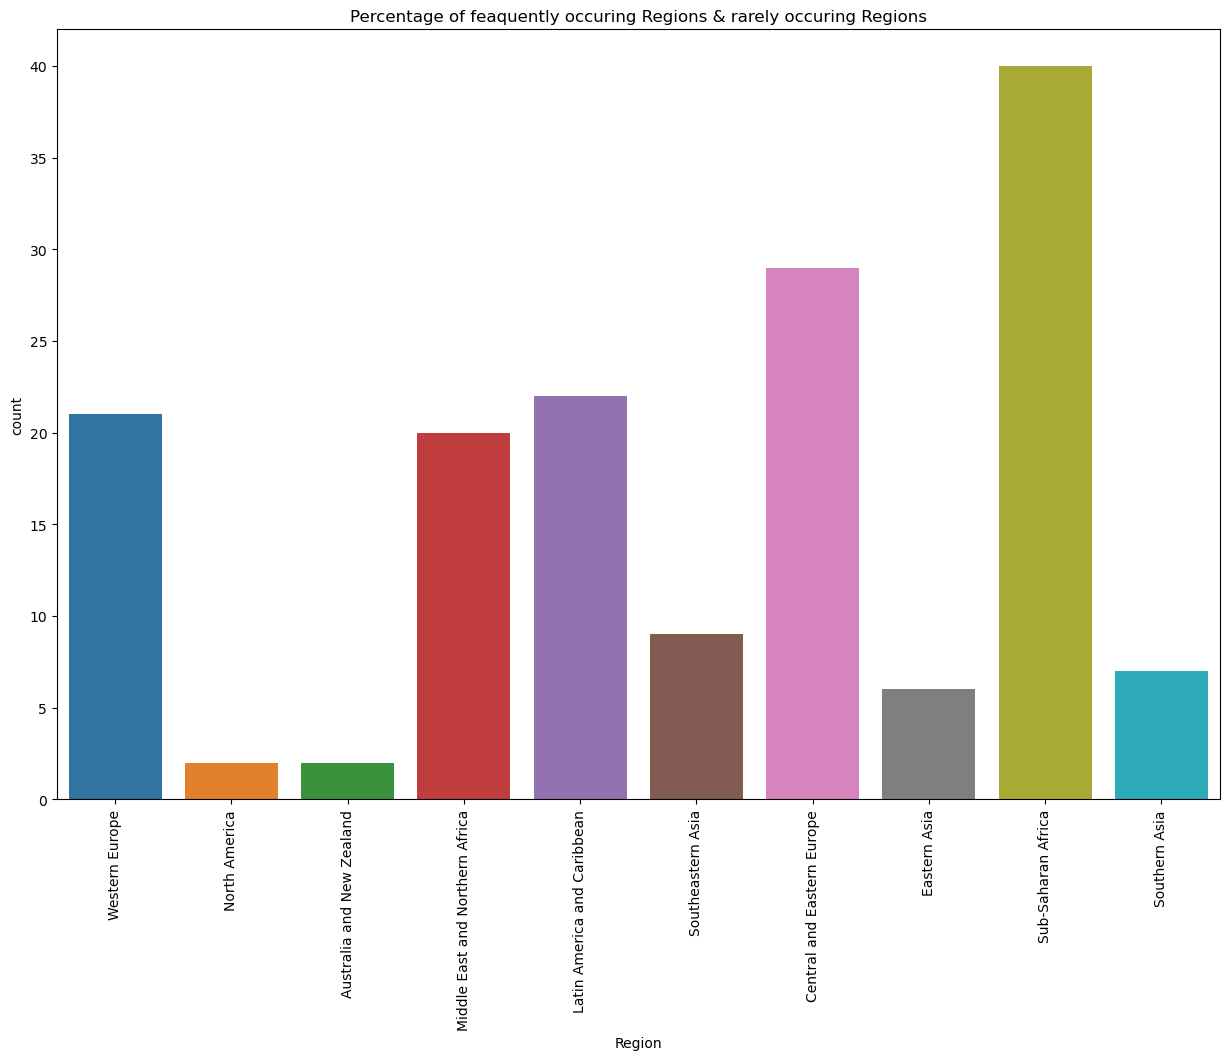

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(df['Region'])
plt.xticks(rotation=90)
plt.title('Percentage of feaquently occuring Regions & rarely occuring Regions')

In [10]:
#Distribution of Continuous data:
# only taking the continuous features:
data_features=df[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

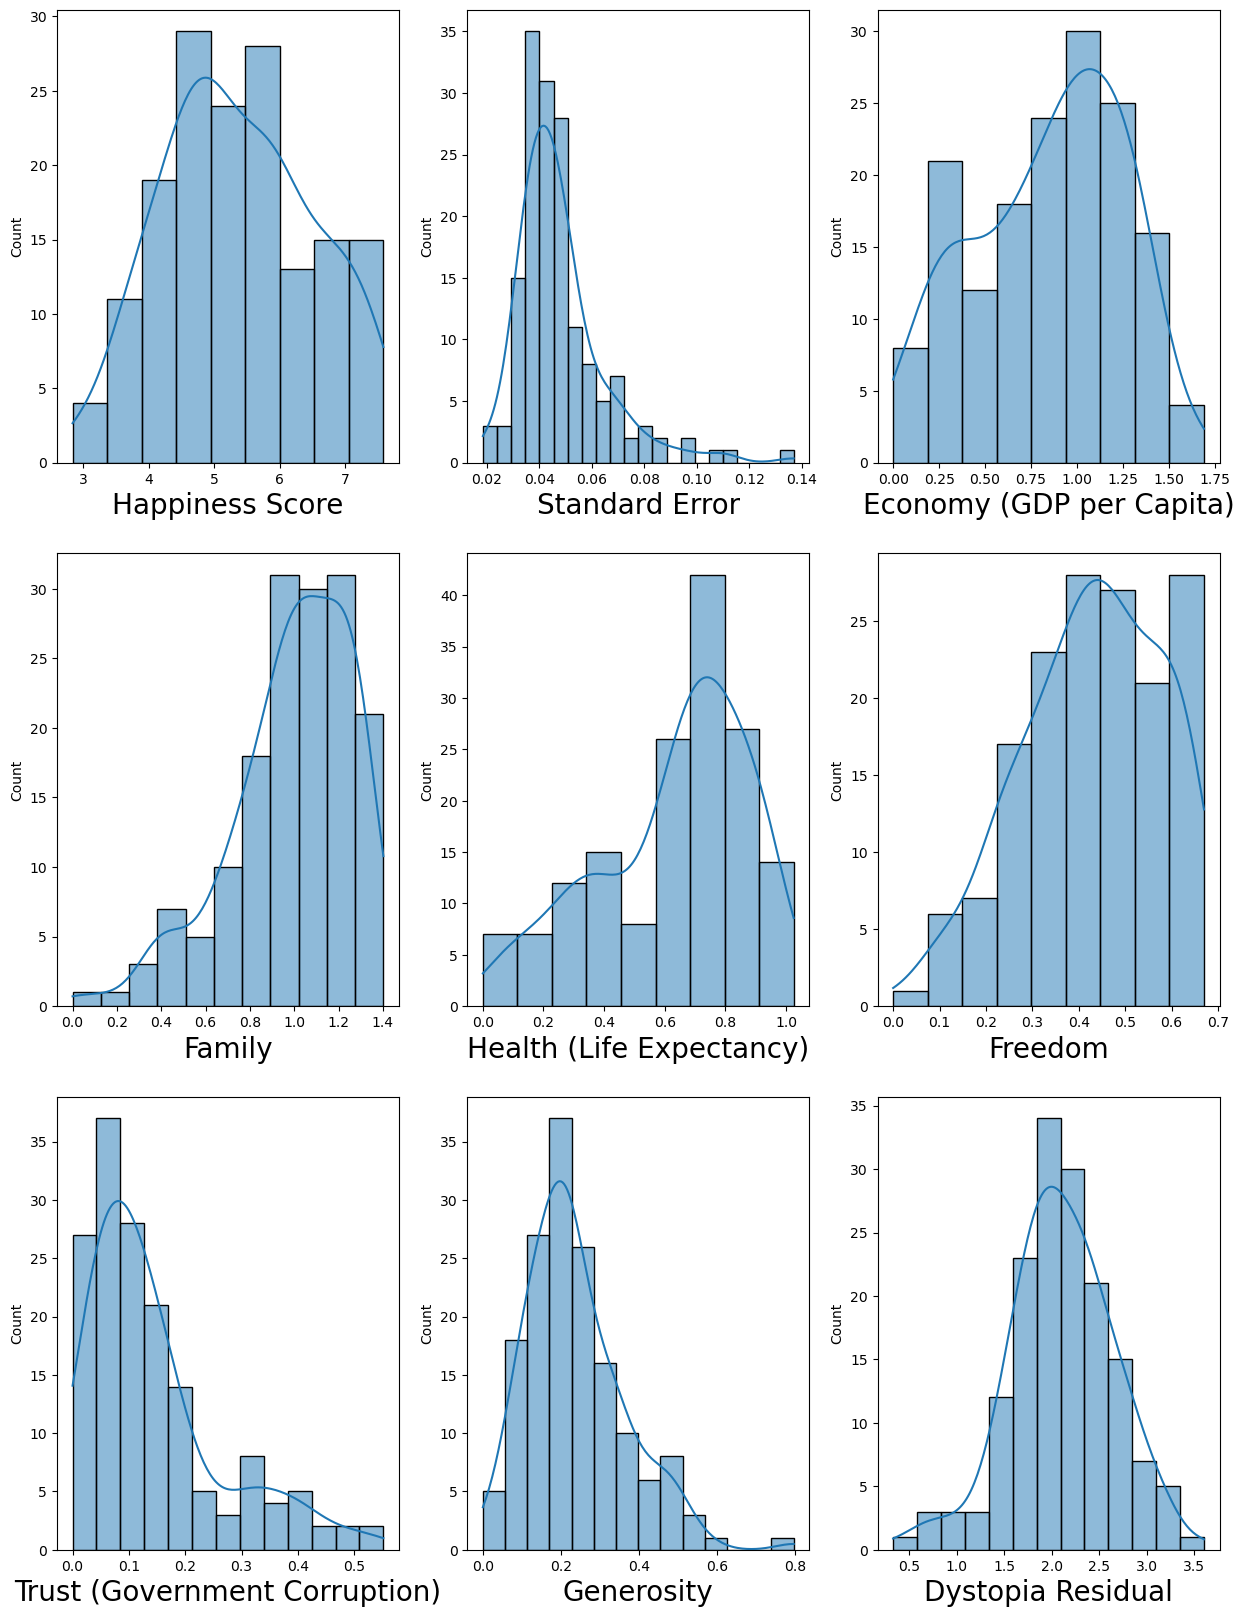

In [11]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From above Histograms it can be seen that Dystopia Residual is normally Distributed. Standard Error and Trust(Government Corruption) are right skewed

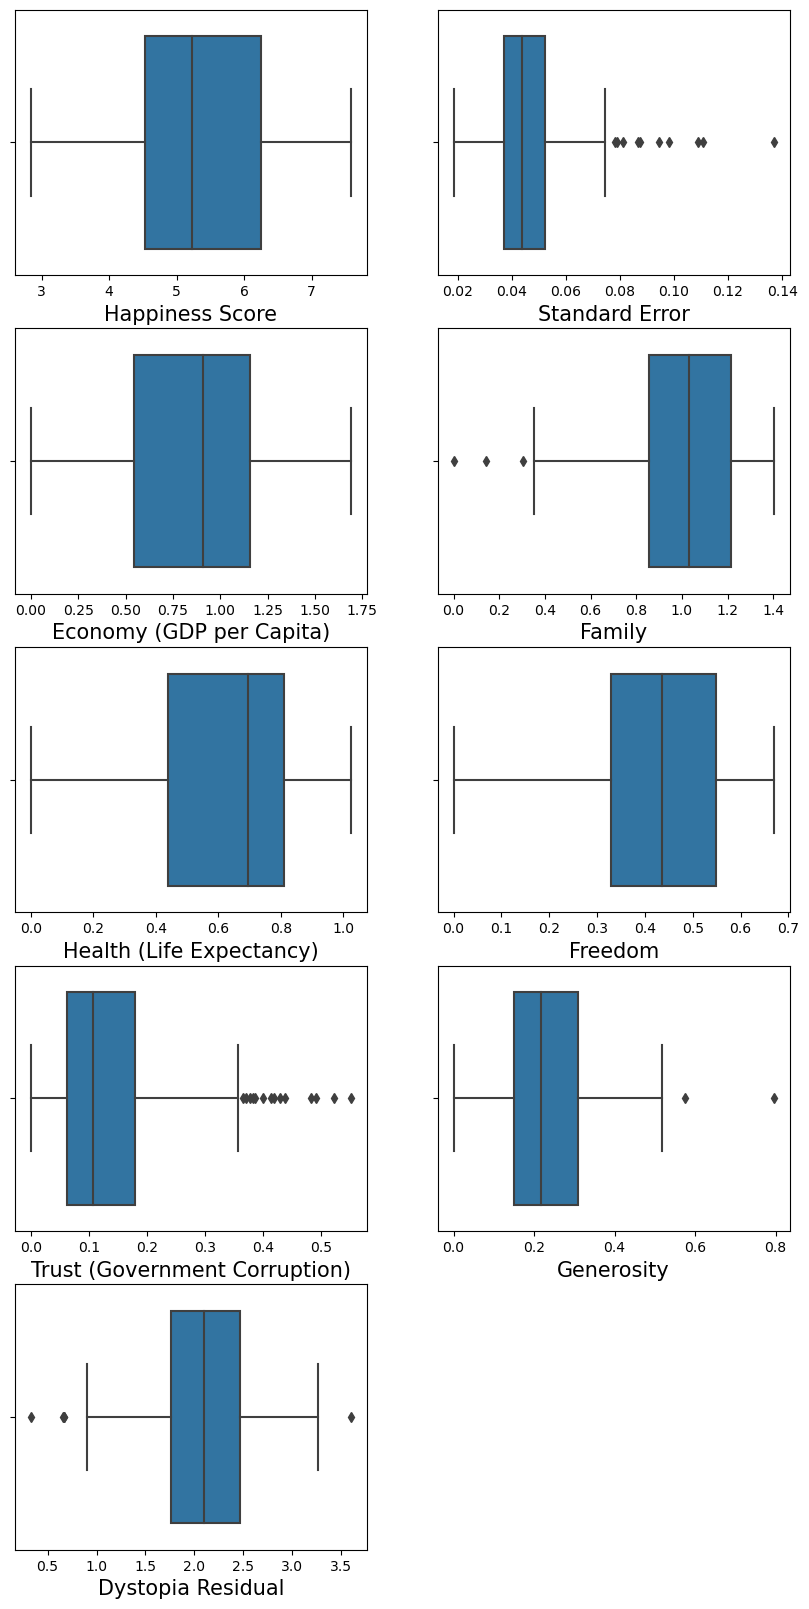

In [12]:
#We are using Boxplot to check outliers.

plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

there are outliers in, Standard Error and Trust(Government Corruption)and few are in Family,Generosity and Dystopya Residual.

In [13]:
#Dropping unnecessory columns:
drop_columns = ['Country']
df = df.drop(columns = drop_columns,axis=1)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


To use Region for Model Creation we need to Encode it with Label Encoder.

In [14]:
df['Region']= LabelEncoder().fit_transform(df['Region'])
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
#the feature and label
y = df['Happiness Score']
x = df.drop(columns=['Happiness Score'])
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


visualization of Relation Between Features with Label: We are using Regression Plot for Visualization.

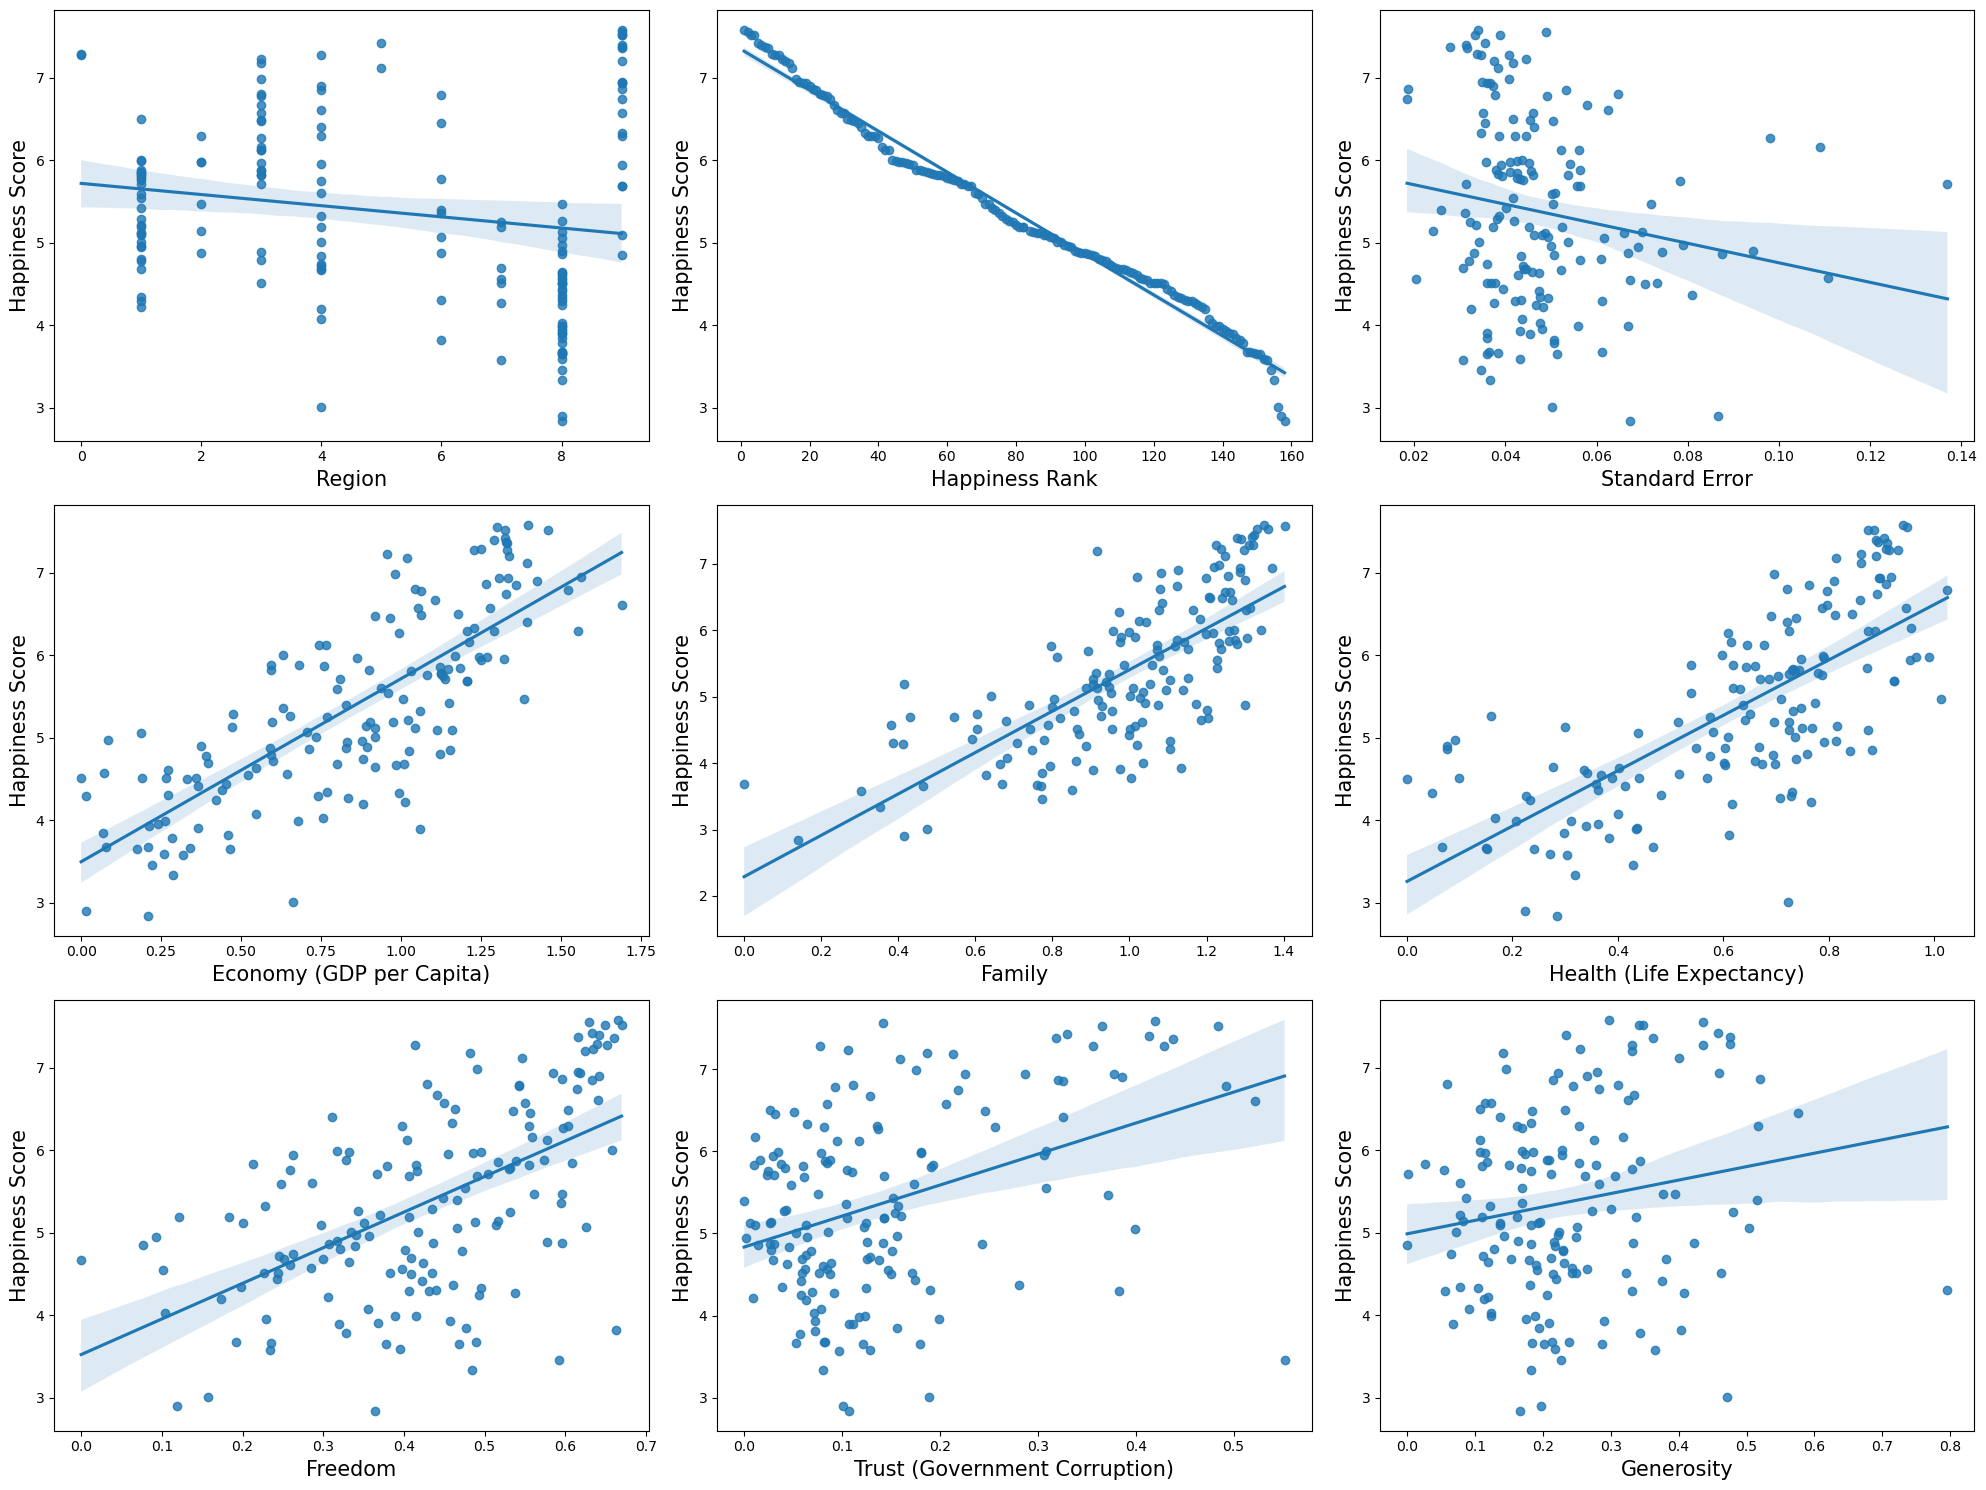

In [16]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Happiness Score',fontsize=15)
    plotnumber+=1
plt.tight_layout()

using Z-Score we will eliminate skewness from the data. By appling Z-score we are going to convert the dataset into Standard Normal distribution

In [17]:
from scipy.stats import zscore

In [18]:
z_score = zscore(df[['Standard Error','Trust (Government Corruption)','Generosity']]) #converting data into standard normal distribution
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<2).all(axis=1)

df=df[filtering_entry]
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,4.925926,82.770370,5.291481,0.046198,0.833866,0.980284,0.626255,0.413530,0.122766,0.219890,2.094910
std,2.991604,44.140708,1.088192,0.011882,0.383269,0.270843,0.242117,0.146681,0.087966,0.108942,0.561403
min,0.000000,2.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.002270,0.000000,0.328580
25%,2.000000,47.500000,4.515500,0.037895,0.546035,0.853755,0.437975,0.320130,0.060675,0.137335,1.756165
50%,4.000000,82.000000,5.192000,0.044490,0.900190,1.015280,0.696390,0.416910,0.104410,0.208430,2.063670
75%,8.000000,120.500000,5.979500,0.050840,1.128500,1.204605,0.790780,0.530730,0.158180,0.281240,2.452745
max,9.000000,158.000000,7.561000,0.080960,1.563910,1.402230,1.013280,0.669730,0.377980,0.479980,3.602140


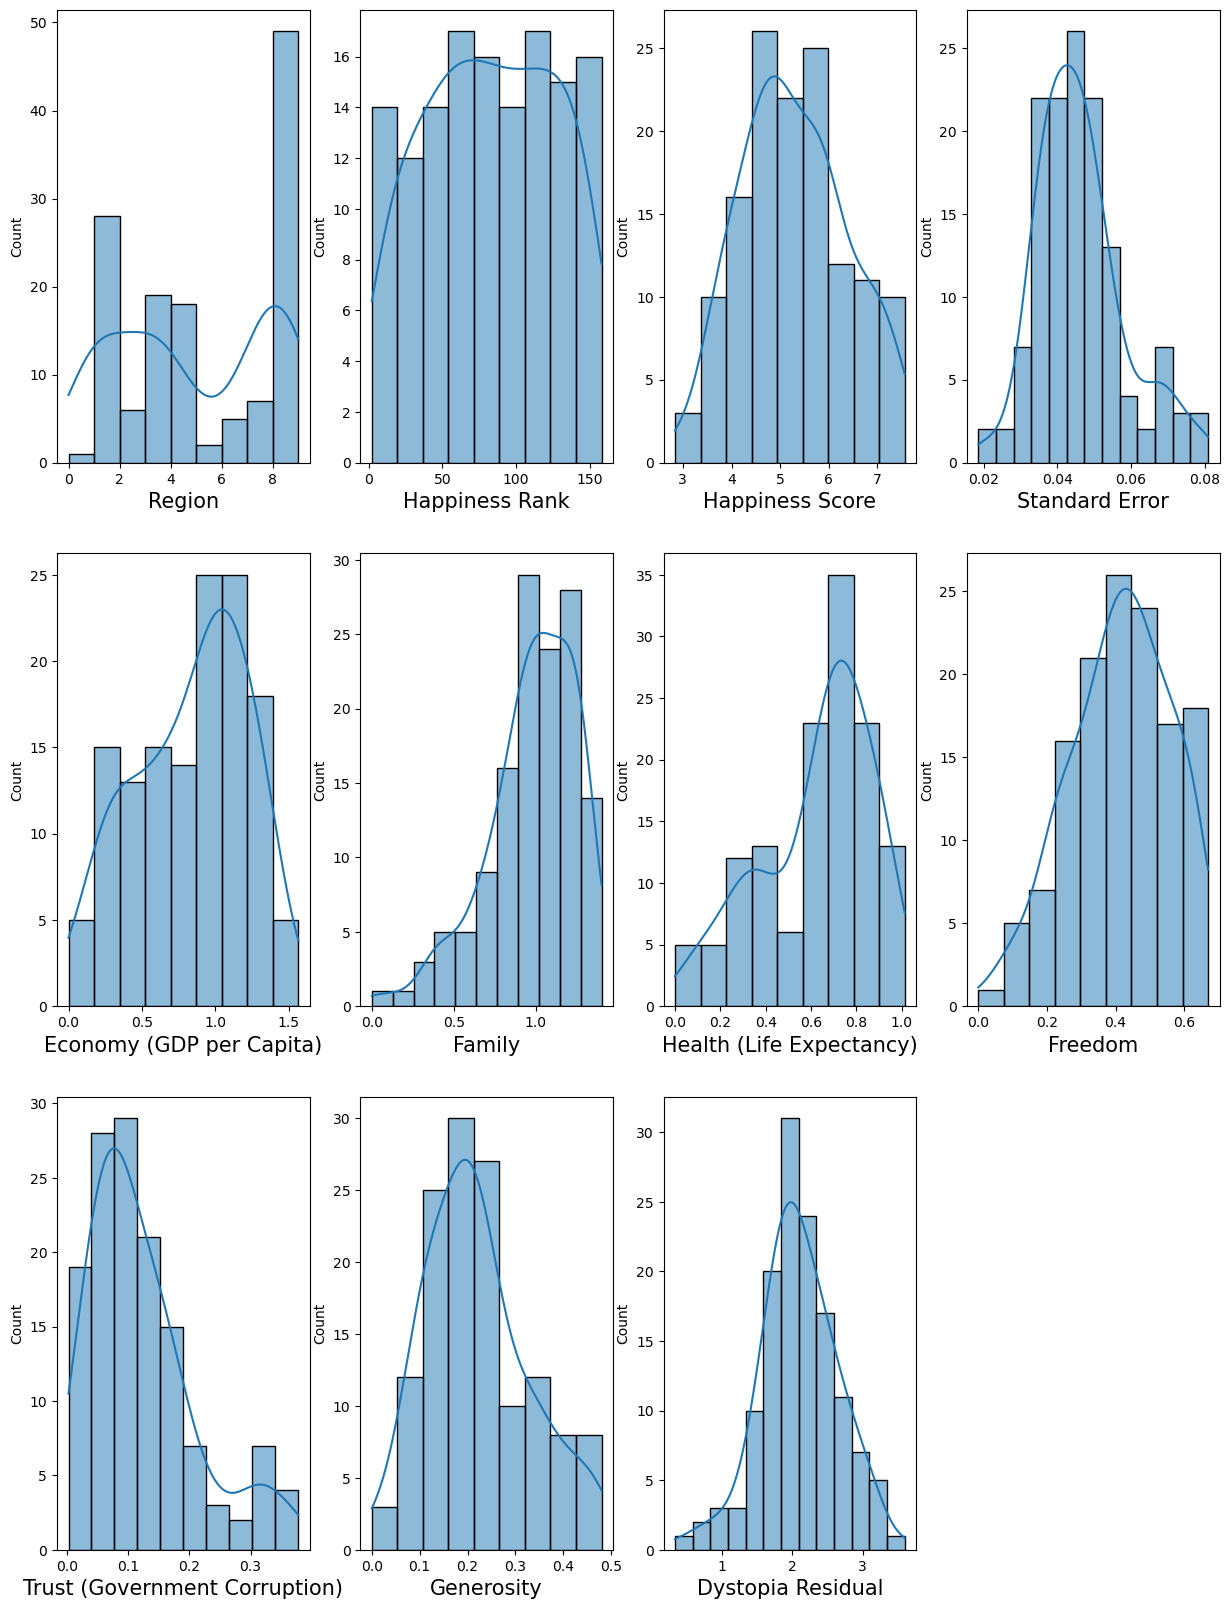

In [19]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

finding the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

In [20]:
corr = df.corr()
corr

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.289728,-0.250133,-0.003816,-0.300103,-0.246983,-0.408808,0.080399,0.136673,0.269036,-0.079063
Happiness Rank,0.289728,1.000000,-0.992068,0.165393,-0.759117,-0.704560,-0.730473,-0.490885,-0.368099,-0.092562,-0.545894
Happiness Score,-0.250133,-0.992068,1.000000,-0.174132,0.752885,0.714007,0.714134,0.498595,0.380948,0.117217,0.559203
Standard Error,-0.003816,0.165393,-0.174132,1.000000,-0.177576,-0.120800,-0.243097,-0.091145,-0.031529,-0.008999,-0.022677
Economy (GDP per Capita),-0.300103,-0.759117,0.752885,-0.177576,1.000000,0.634177,0.817267,0.275292,0.277096,-0.065580,0.015618
Family,-0.246983,-0.704560,0.714007,-0.120800,0.634177,1.000000,0.528378,0.386308,0.225523,0.000151,0.104444
Health (Life Expectancy),-0.408808,-0.730473,0.714134,-0.243097,0.817267,0.528378,1.000000,0.276798,0.164952,0.058136,0.030681
Freedom,0.080399,-0.490885,0.498595,-0.091145,0.275292,0.386308,0.276798,1.000000,0.444236,0.347706,0.074478
Trust (Government Corruption),0.136673,-0.368099,0.380948,-0.031529,0.277096,0.225523,0.164952,0.444236,1.000000,0.289261,0.040447
Generosity,0.269036,-0.092562,0.117217,-0.008999,-0.065580,0.000151,0.058136,0.347706,0.289261,1.000000,-0.083365


plot the correlation between feature vs feature and feature vs label by using Heat Map

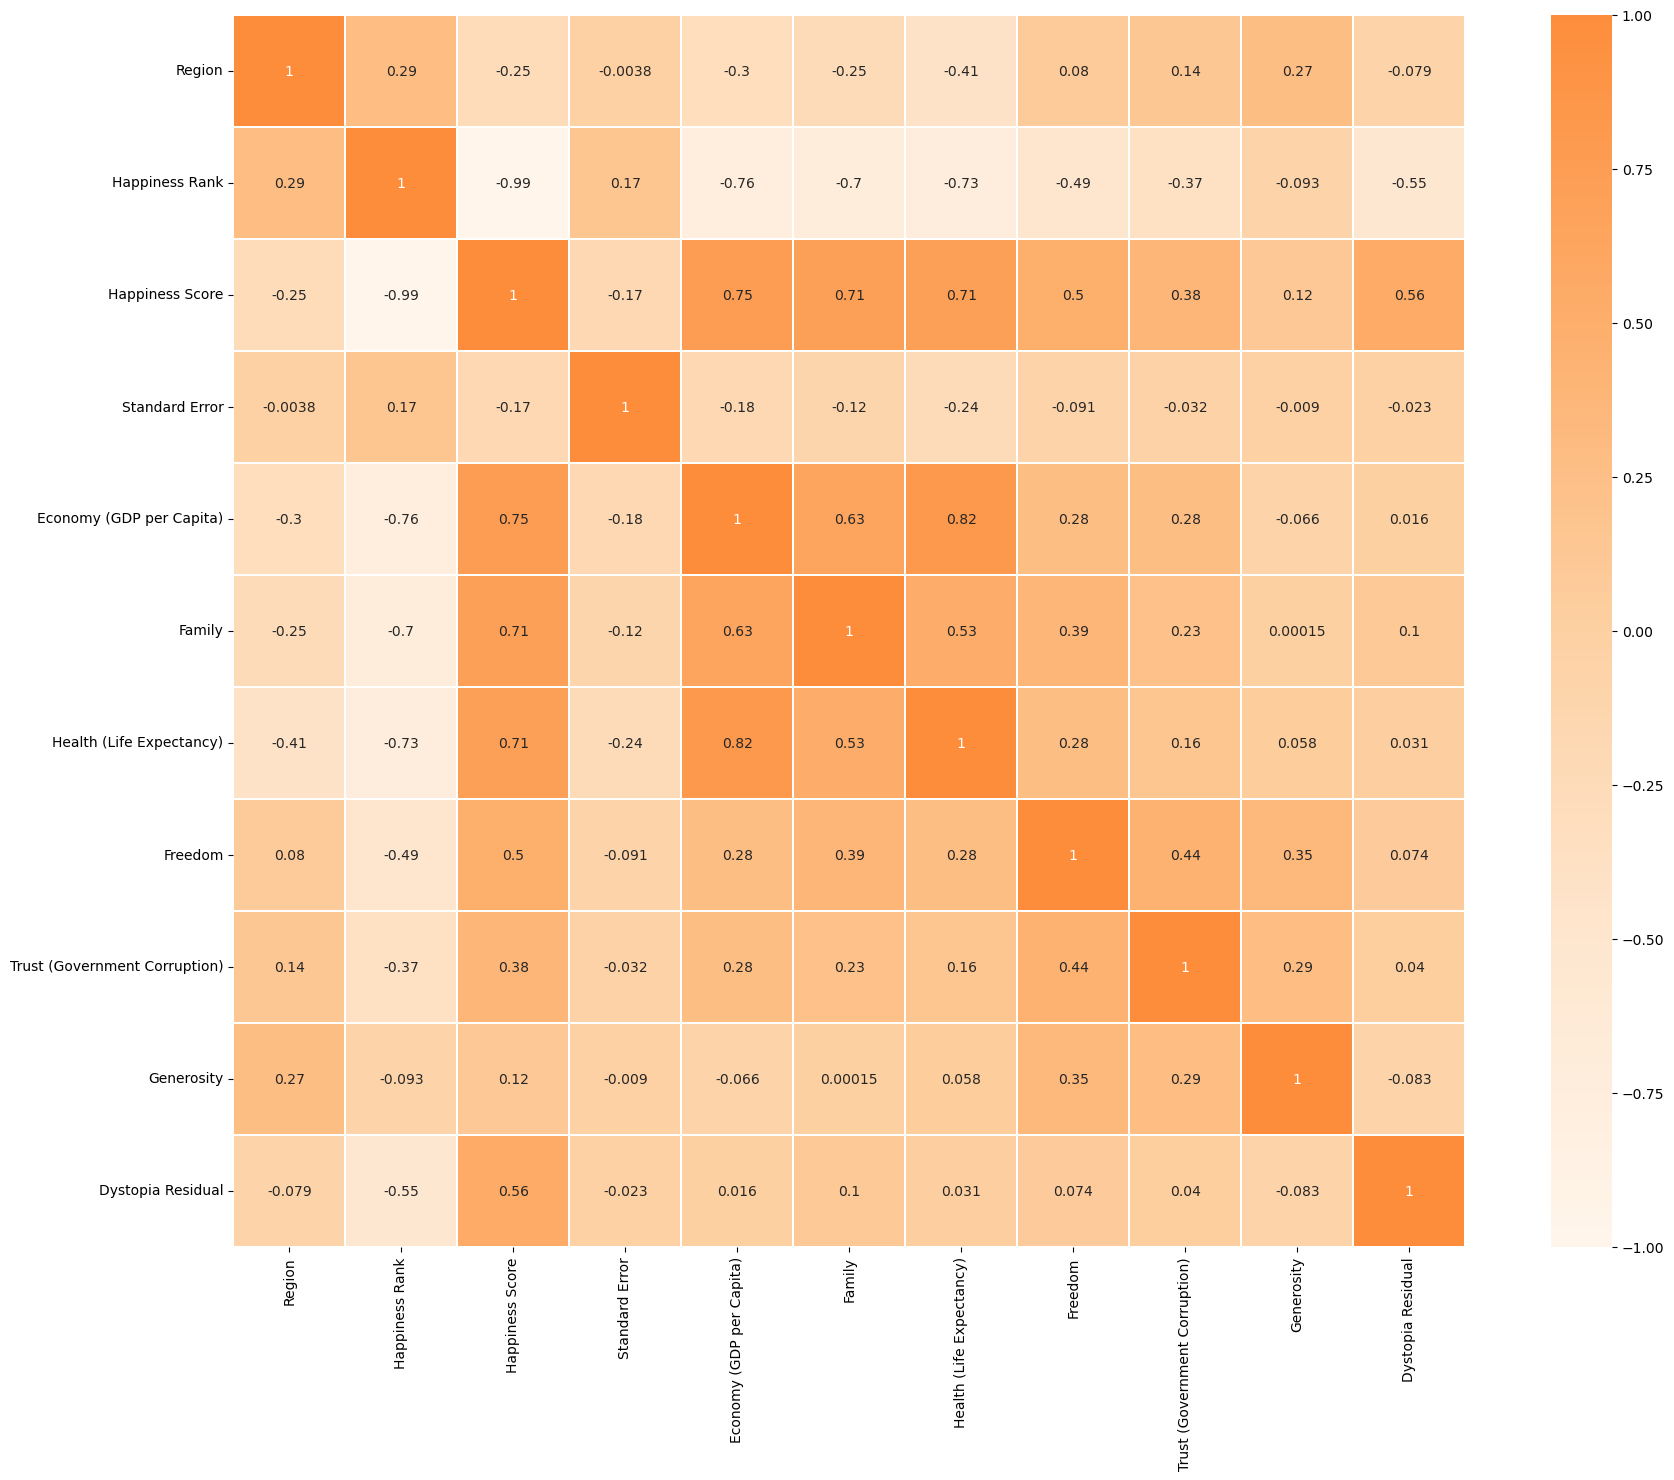

In [21]:
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Oranges',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,linewidths=.1,linecolor='white')
plt.show()

Economy,Family and Health has correlation. Now we need to use VIF for checking is really there any multicolinearity in the dataset or not,for that first we need to do standardize the data then we can use Variance Inflation Factor.

In [22]:
# data Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.455090,Region
1,74.534606,Happiness Rank
2,1.187792,Standard Error
3,13.204463,Economy (GDP per Capita)
4,5.631962,Family
5,8.025676,Health (Life Expectancy)
6,3.201631,Freedom
7,2.042851,Trust (Government Corruption)
8,2.122792,Generosity
9,17.632286,Dystopia Residual


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

In [25]:
#1. Linear Rgression:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [27]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.9999999451038596


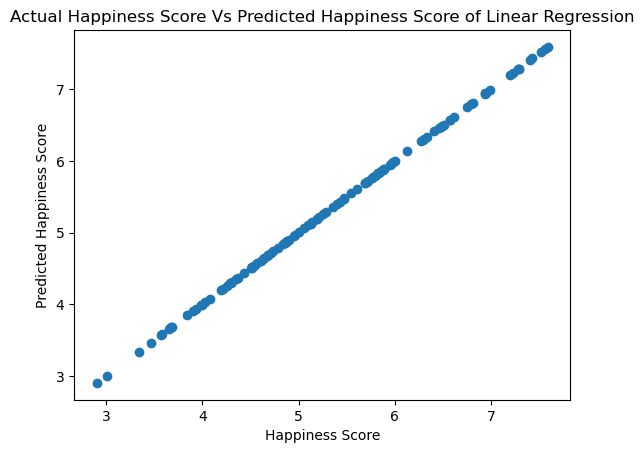

In [28]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of Linear Regression')
plt.show()

In [29]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [30]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.9999999347600026


In [31]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  0.0002616262403569047


In [32]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  9.248732749725e-08


In [33]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  0.0003041172923351285


Scores of Linear Regression:
Accuracy - 0.9999999347600026
MAE of LR - 0.00026162624035681593
MSE of LR - 9.248732749715894e-08
RMSE of LR - 0.0003041172923349788

Regularization using Lasso

In [34]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [35]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.00010258130097369185

In [36]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010258130097369185)

In [37]:
lasso_reg.score(x_test,y_test)

0.9999992043502652

Regularization Using Ridge:

In [38]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [39]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [40]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [41]:
ridge_model.score(x_test,y_test)

0.9999999317027523

Both Lasso and Ridge is giving score of 0.999 as Linear Regression. So, there is no overfitting problem present

Cross Validation 

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.99999994 0.99999993 0.99999989 0.99999995 0.99999993]
mean : 0.999999928627201


save linear Regression Model for predicting World Happiness Score

In [44]:
# model prediction using Linear Regression
x_predict = list(lr.predict(x_test))
lr_world_happiness = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(lr_world_happiness))

     predicted_values  orignal_values
6            7.378067           7.378
103          4.799526           4.800
62           5.754344           5.754
45           5.987084           5.987
131          4.270555           4.271
145          3.780743           3.781
116          4.564744           4.565
54           5.847671           5.848
23           6.797729           6.798
89           5.073258           5.073
2            7.526963           7.527
20           6.867184           6.867
13           7.187351           7.187
19           6.901384           6.901
91           5.013161           5.013
77           5.268104           5.268
144          3.819134           3.819
75           5.332535           5.332
42           6.122844           6.123
142          3.896440           3.896
108          4.694002           4.694
44           5.995168           5.995
7            7.363576           7.364
88           5.097599           5.098
157          2.839026           2.839
97          